# Modelos de Regresión para predicción de precios y Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [12]:
ps = pd.read_csv(r'C:\Users\francisco.chedufau\Downloads\Regressiontp.csv', delimiter=',')
ps.head()

,indice_tiempo,producto,provincia,precio promedio,Peso to Dolar
0,2016-04,GNC,BUENOS AIRES,12.49,14.393586
1,2016-06,GNC,BUENOS AIRES,11.94,14.376814
2,2016-06,GNC,NEUQUEN,9.90,14.376814
3,2016-07,GNC,TUCUMAN,10.69,14.857545
4,2016-08,GNC,TUCUMAN,10.68,14.791987


In [13]:
producto_dummie = pd.get_dummies(ps.producto)
producto_dummie.head(3)

,GNC,Gas Oil Grado 2,Gas Oil Grado 3,Nafta (premium) de más de 95 Ron,Nafta (súper) entre 92 y 95 Ron
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0


In [14]:
provincia_dummie = pd.get_dummies(ps.provincia)
provincia_dummie.head(3)

,BUENOS AIRES,CAPITAL FEDERAL,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
ps = pd.concat([ps, producto_dummie, provincia_dummie], axis = 1)
ps = ps.set_index('indice_tiempo')
ps.head()

,producto,provincia,precio promedio,Peso to Dolar,GNC,Gas Oil Grado 2,Gas Oil Grado 3,Nafta (premium) de más de 95 Ron,Nafta (súper) entre 92 y 95 Ron,BUENOS AIRES,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2016-04,GNC,BUENOS AIRES,12.49,14.393586,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-06,GNC,BUENOS AIRES,11.94,14.376814,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-06,GNC,NEUQUEN,9.90,14.376814,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2016-07,GNC,TUCUMAN,10.69,14.857545,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-08,GNC,TUCUMAN,10.68,14.791987,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
y = np.array(ps[["precio promedio"]])

In [17]:
x = ps.drop(['precio promedio', 'producto','provincia'], axis=1)

In [18]:
np.max(x)

Peso to Dolar                       54.755619
GNC                                  1.000000
Gas Oil Grado 2                      1.000000
Gas Oil Grado 3                      1.000000
Nafta (premium) de más de 95 Ron     1.000000
Nafta (súper) entre 92 y 95 Ron      1.000000
BUENOS AIRES                         1.000000
CAPITAL FEDERAL                      1.000000
CATAMARCA                            1.000000
CHACO                                1.000000
CHUBUT                               1.000000
CORDOBA                              1.000000
CORRIENTES                           1.000000
ENTRE RIOS                           1.000000
FORMOSA                              1.000000
JUJUY                                1.000000
LA PAMPA                             1.000000
LA RIOJA                             1.000000
MENDOZA                              1.000000
MISIONES                             1.000000
NEUQUEN                              1.000000
RIO NEGRO                         

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.70, random_state=1)
xtrain.head()

,Peso to Dolar,GNC,Gas Oil Grado 2,Gas Oil Grado 3,Nafta (premium) de más de 95 Ron,Nafta (súper) entre 92 y 95 Ron,BUENOS AIRES,CAPITAL FEDERAL,CATAMARCA,CHACO,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2018-08,29.180239,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2019-08,51.705022,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2018-12,33.692043,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-04,23.378415,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-10,33.568738,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
xtrain.shape

(345, 30)

In [21]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
xtrain_scal = scaler.transform(xtrain)  

In [23]:
xtest_scal = scaler.transform(xtest) 

# Modelo de Regresión Lineal

In [24]:
#Modelo de Regresión lineal
lr = LinearRegression()

In [25]:
lr.fit(xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
ypred = lr.predict(xtest_scal)

In [27]:
np.shape(ypred)

(805, 1)

In [28]:
np.sqrt(mean_squared_error(ytest, ypred))

4.133367519470559

In [29]:
mean_squared_error(ytest, ypred)

17.0847270510142

In [30]:
mean_absolute_error(ytest, ypred)

3.2854142754479043

# Modelo de KNN

In [31]:

neigh = KNeighborsRegressor(weights = "distance")

In [32]:
parameters_k = np.arange(20,31,5)
parameters_k

array([20, 25, 30])

In [33]:
parameters_knn = [{'n_neighbors': parameters_k}]

In [34]:
n_folds = 5

In [35]:
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=n_folds, verbose=True)

In [36]:
regresor_neigh.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([20, 25, 30])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [37]:
regresor_neigh.best_params_

{'n_neighbors': 20}

In [38]:
regresor_neigh.best_score_

0.6057553615214982

In [41]:
ypred2 = regresor_neigh.predict(xtest_scal)
ypred2

array([[37.18613079],
       [34.23404793],
       [32.27302848],
       [39.1220098 ],
       [40.78683692],
       [33.56315471],
       [25.23943681],
       [35.35933417],
       [42.54341042],
       [44.72876996],
       [32.82732374],
       [23.56138255],
       [50.63744852],
       [20.83807698],
       [37.05233534],
       [27.29171239],
       [24.70758704],
       [24.92681016],
       [43.92147458],
       [28.114638  ],
       [34.20930254],
       [26.00772695],
       [35.03496808],
       [27.64109857],
       [39.85200554],
       [23.06048619],
       [40.57877593],
       [24.33865925],
       [51.57919202],
       [41.86085549],
       [33.11017443],
       [20.55224823],
       [31.96990044],
       [45.49935836],
       [37.02212274],
       [30.54562699],
       [37.9005218 ],
       [12.89785245],
       [47.31096852],
       [34.33617456],
       [41.50057411],
       [26.1473327 ],
       [34.82853157],
       [24.13667901],
       [39.49180798],
       [34

In [42]:
np.sqrt(mean_squared_error(ytest, ypred2))

8.084334356999745

In [43]:
mean_squared_error(ytest, ypred)

17.0847270510142

In [44]:
mean_absolute_error(ytest, ypred)

3.2854142754479043

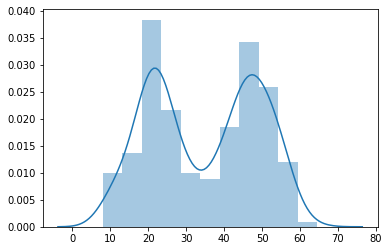

In [45]:
sns.distplot(ytest)
plt.show()

# Modelo de SVR

In [46]:
svreg = SVR()

In [47]:
n_folds = 5

In [48]:
parameters_svr_lin = [{'kernel':['linear'], 'C': [1, 100]}]

parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]

In [49]:
regresor_svr = GridSearchCV(svreg, parameters_svr_lin, cv=n_folds, verbose=True)

In [50]:
regresor_svr.fit(xtrain_scal, ytrain.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [60]:
regresor_svr.best_params_

{'C': 1, 'kernel': 'linear'}

In [61]:
regresor_svr.best_score_

0.8925640073082912

In [62]:
ypred3 = regresor_svr.predict(xtest_scal)
ypred3

array([51.56064049, 18.39467935, 41.08242592, 38.00977297, 47.20048366,
       36.67521424, 27.60155521, 54.157839  , 38.80253784, 55.34169745,
       32.76428872, 21.71073908, 48.36265308, 26.66750604, 52.02649623,
       27.31255543, 26.72311156, 25.99762531, 44.90174684, 33.84391522,
       32.00888345, 24.37018576, 34.45747111, 22.46350494, 47.23858414,
       28.44945345, 46.58584573,  2.98147631, 51.75339348, 54.96351664,
       36.76116716, 25.26887296, 33.43602628, 40.54339532, 58.21839637,
       34.41811834, 39.70012445,  1.6584345 , 50.81137676, 15.51146558,
       52.28300761, 31.01310429, 47.734976  , 18.90558157, 46.17556969,
       35.99546033, 40.68853829, 26.12992652, 28.94823548, 36.4163307 ,
       30.39478018, 27.06817137, 10.9919187 , 53.21885455, 47.18297629,
       31.38680625, 54.9485675 , 13.59612523, 15.868135  , 42.06970381,
       31.75299036, 43.52507876, 56.43984887, 20.43813102, 24.35311917,
       50.63990118, 33.77659731, 46.53415921, 24.60882572, 21.71

In [63]:
np.sqrt(mean_squared_error(ytest, ypred3))

4.2525619565063

In [64]:
mean_squared_error(ytest, ypred3)

18.08428319392469

In [65]:
mean_absolute_error(ytest, ypred3)

3.296827039062567

# Conclusión

Utilizamos SVR para predecir los precios según el best score de 0.89 y el menor MAE 3.30, considerando un MSE de 18,08

# Clustering

In [1]:
# Importamos librerias de PCA y silhouette_score
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering

In [5]:
ps = pd.read_csv(r'C:\Users\francisco.chedufau\Downloads\precios-en-surtidor-resolucin-3142016.csv')

In [6]:
ps.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


In [7]:
ps = ps.drop(ps.loc[ps['region'].isnull()].index) 

In [8]:
regiones = len(ps['region'].unique())
print("\n", ps['region'].unique())
naftas = len(ps['producto'].unique())
print("\n", ps['producto'].unique())


 ['PAMPEANA' 'PATAGONIA' 'CUYO' 'CENTRO' 'NEA' 'NOA']

 ['GNC' 'Gas Oil Grado 2' 'Gas Oil Grado 3'
 'Nafta (premium) de más de 95 Ron' 'Nafta (súper) entre 92 y 95 Ron']


In [9]:
import datetime as dt
ps.indice_tiempo = pd.to_datetime(ps.indice_tiempo)
ps['year'] = ps.indice_tiempo.dt.year

In [10]:
ps.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
0,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
1,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
2,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017
3,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017
4,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017


In [11]:
gnc_2017 = ps[(ps['producto'] == 'GNC')]
gnc_2017.head(5)
gnc_2017 = gnc_2017[(gnc_2017['year'] == 2017)]
gnc_2017.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
0,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
1,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
388,2017-03-01,6162,30-70901572-5,AFG DISTRIBUCION S.R.L.,RUTA DE LA TRADICION 8185,9 DE ABRIL,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-31 10:11:00,24,OIL COMBUSTIBLES S.A.,-34.739545,-58.496497,"{""type"":""Point"",""coordinates"":[-58.496497,-34....",2017
389,2017-03-01,6162,30-70901572-5,AFG DISTRIBUCION S.R.L.,RUTA DE LA TRADICION 8185,9 DE ABRIL,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-31 10:11:00,24,OIL COMBUSTIBLES S.A.,-34.739545,-58.496497,"{""type"":""Point"",""coordinates"":[-58.496497,-34....",2017
1010,2017-04-01,3612,30-68260383-2,ALGARROBITOS S.A.,CRUCE RUTA PROVINCIAL 6 Y 10,HERNANDO,CORDOBA,CENTRO,6,GNC,2,Diurno,12.99,2017-04-06 15:09:00,1,BLANCA,-32.442740,-63.713770,"{""type"":""Point"",""coordinates"":[-63.71377,-32.4...",2017


In [20]:
x = gnc_2017.iloc[:,[12]]

In [21]:
x.head()

,precio
0,8.79
1,8.79
388,8.79
389,8.79
1010,12.99


In [22]:
x.shape

(242, 1)

In [23]:
scaler = preprocessing.StandardScaler().fit(x)

In [24]:
xscal = scaler.transform(x)

In [25]:
kmeans = KMeans(n_clusters=6, random_state=10).fit(xscal)

In [26]:
sill_score_kmeans = silhouette_score(xscal,kmeans.labels_)
print(sill_score_kmeans)

0.6452632070847746


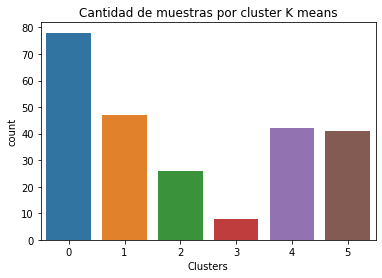

In [27]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

# Conclusión

Se alcanzó agrupar 6 clusters con un silhouette score de 0.645; lo cual indica que tienen una significativa separación entre clusters, siendo 1 la máxima